<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reinforcement learning
!pip install gymnasium --quiet
import gymnasium as gym


--- Supervised Learning: Logistic Regression on Iris ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Test Accuracy: 1.0


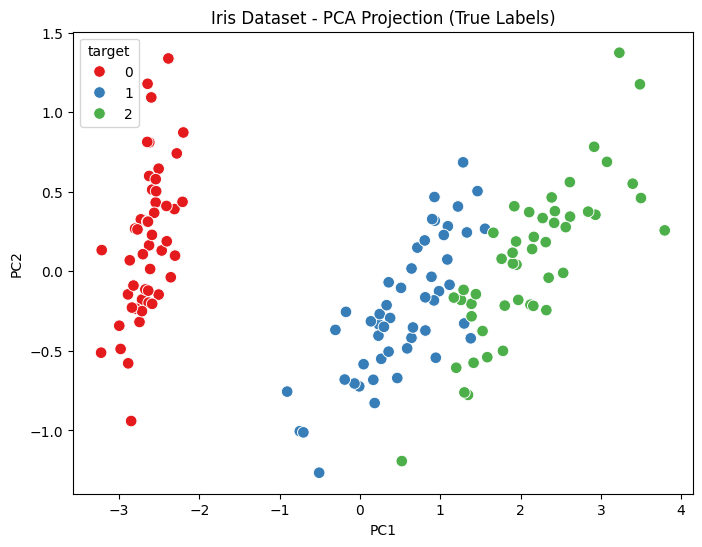

In [2]:
print("\n--- Supervised Learning: Logistic Regression on Iris ---")

# Load Iris data
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Plot decision regions (PCA for 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='target', palette='Set1', s=70)
plt.title("Iris Dataset - PCA Projection (True Labels)")
plt.show()



--- Unsupervised Learning: K-Means Clustering on Digits ---
Adjusted Rand Index (Cluster-Label Agreement): 0.6669


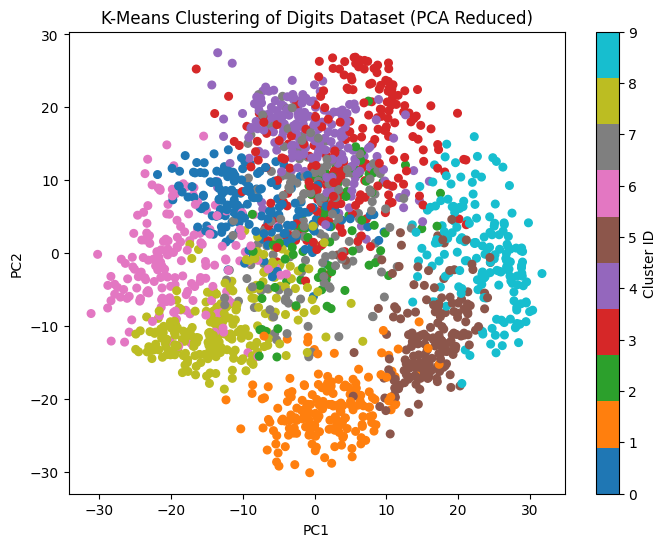

In [3]:
print("\n--- Unsupervised Learning: K-Means Clustering on Digits ---")

# Load Digits data
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_digits)

# Evaluation
ari_score = adjusted_rand_score(y_digits, clusters)
print(f"Adjusted Rand Index (Cluster-Label Agreement): {ari_score:.4f}")

# Reduce to 2D for visualization using PCA
pca_digits = PCA(n_components=2)
X_digits_2d = pca_digits.fit_transform(X_digits)

plt.figure(figsize=(8, 6))
plt.scatter(X_digits_2d[:, 0], X_digits_2d[:, 1], c=clusters, cmap='tab10', s=30)
plt.title("K-Means Clustering of Digits Dataset (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster ID")
plt.show()



--- Reinforcement Learning: CartPole Example ---
Total Rewards per Episode: [16.0, 30.0, 24.0, 22.0, 14.0, 11.0, 17.0, 28.0, 12.0, 38.0]
Average Reward: 21.20


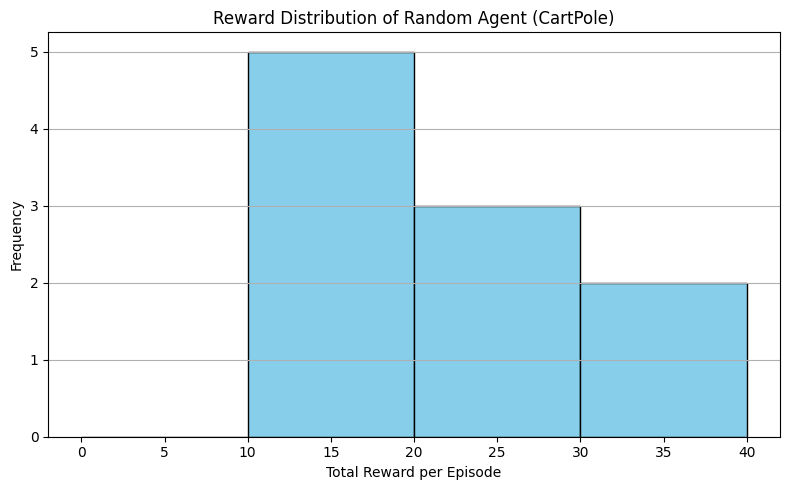

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
import math

print("\n--- Reinforcement Learning: CartPole Example ---")

env = gym.make("CartPole-v1", render_mode=None)
n_episodes = 10
rewards_per_episode = []

for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0

    while True:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break

    rewards_per_episode.append(total_reward)

env.close()
print(f"Total Rewards per Episode: {rewards_per_episode}")
print(f"Average Reward: {sum(rewards_per_episode)/n_episodes:.2f}")

# ✅ Fix: Convert max reward to int for range()
plt.figure(figsize=(8, 5))
plt.hist(rewards_per_episode, bins=range(0, math.ceil(max(rewards_per_episode)) + 10, 10), color='skyblue', edgecolor='black')
plt.title("Reward Distribution of Random Agent (CartPole)")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
